## Customize layer
Kế thừa lớp tf.keras.layers.Layer, và khai báo layer mới, hoặc tạo custom Model ResnetIdentityBlock như bên dưới

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0-beta0'

In [3]:
print(tf.test.is_gpu_available())

False


In [4]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [5]:
layer(tf.zeros([10, 5]))

<tf.Tensor: id=29, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [6]:
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.01268512, -0.2507405 , -0.17948177,  0.13990808, -0.6316004 ,
          0.2381199 ,  0.29263532, -0.2256074 , -0.3741575 ,  0.06938547],
        [-0.20159394, -0.61356014, -0.56016165,  0.09127492,  0.45443338,
         -0.13940156,  0.09978729,  0.22858262,  0.3783552 ,  0.05982411],
        [ 0.62119585,  0.07317543,  0.09677827,  0.5791169 , -0.1515078 ,
          0.3474853 ,  0.3958506 ,  0.32677728, -0.07537752,  0.5610165 ],
        [ 0.2181747 ,  0.08043784,  0.42500764,  0.25388324,  0.52707475,
          0.1267547 ,  0.3812521 ,  0.16025132,  0.15215105,  0.02198535],
        [-0.4948324 ,  0.47400326,  0.5445524 ,  0.6182149 , -0.42289782,
         -0.5645583 ,  0.37033468, -0.39167467, -0.45625222, -0.3581322 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [7]:
layer.kernel, layer.bias

(<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.01268512, -0.2507405 , -0.17948177,  0.13990808, -0.6316004 ,
          0.2381199 ,  0.29263532, -0.2256074 , -0.3741575 ,  0.06938547],
        [-0.20159394, -0.61356014, -0.56016165,  0.09127492,  0.45443338,
         -0.13940156,  0.09978729,  0.22858262,  0.3783552 ,  0.05982411],
        [ 0.62119585,  0.07317543,  0.09677827,  0.5791169 , -0.1515078 ,
          0.3474853 ,  0.3958506 ,  0.32677728, -0.07537752,  0.5610165 ],
        [ 0.2181747 ,  0.08043784,  0.42500764,  0.25388324,  0.52707475,
          0.1267547 ,  0.3812521 ,  0.16025132,  0.15215105,  0.02198535],
        [-0.4948324 ,  0.47400326,  0.5445524 ,  0.6182149 , -0.42289782,
         -0.5645583 ,  0.37033468, -0.39167467, -0.45625222, -0.3581322 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [8]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                    shape=[int(input_shape[-1]),
                                           self.num_outputs])

    def call(self, input):
        return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)

In [9]:
_ = layer(tf.zeros([10, 5])) # Calling the layer `.builds` it.

In [10]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


In [11]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])

In [12]:
_ = block(tf.zeros([1, 2, 3, 3])) 

In [13]:
block.layers

In [14]:
block.summary()

Model: "resnet_identity_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  8         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
________________________________________________

## Custom training

In [15]:
# Using Python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [16]:
v = tf.Variable(1.0)
# Use Python's `assert` as a debugging statement to test the condition
assert v.numpy() == 1.0

# Reassign the value `v`
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow `tf.square()` operation and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

Sử dụng .numpy() để kiểm tra Variable

Sử dụng tf.Variable để tự động theo dõi khi thực hiện Gradient. (W, b)
Định nghĩa 1 linear model **f(x) = x * W + b**

1. Define the model.
2. Define a loss function.
3. Obtain training data.
4. Run through the training data and use an "optimizer" to adjust the variables to fit the data.

In [17]:
class Model(object):
    def __init__(self):
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [19]:
tf.square(3.0).numpy()

9.0

In [20]:
# Định nghĩa loss function
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

In [21]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [22]:
print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

Current loss: 8.895622


Sử dụng **gradient descent** để update the weights variable (W) and the bias variable (b) nhằm làm giảm loss. Có nhiều biến thể của gradient descent và được khai báo trong **tf.train.Optimizer**.

Tuy nhiên, ở đây ta sử dụng tf.GradientTape và tf.assign_sub để viết lại như sau

In [23]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.89562
Epoch  1: W=4.61 b=0.40, loss=6.07509
Epoch  2: W=4.30 b=0.73, loss=4.25632
Epoch  3: W=4.05 b=0.98, loss=3.08314
Epoch  4: W=3.84 b=1.19, loss=2.32616
Epoch  5: W=3.67 b=1.35, loss=1.83757
Epoch  6: W=3.54 b=1.48, loss=1.52210
Epoch  7: W=3.43 b=1.58, loss=1.31835
Epoch  8: W=3.34 b=1.66, loss=1.18670
Epoch  9: W=3.27 b=1.73, loss=1.10161


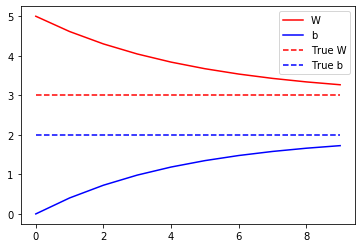

In [26]:
import matplotlib.pyplot as plt

model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

Quan sát sử dụng GD đưa W, b tiến dần tới W_true, b_true.